NN - Bank Customer Churn Modeling.

1st case study - Project 1:

The case study is from an open source dataset from Kaggle.

Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

Bank Customer Classification : 
Given a dataset consisiting of Bank Customer information, we are asked to build a classifier which will tell us if a customer will leave or not using Neural networks?

In [158]:
!pip install scikit-learn==0.22.0

In [0]:
%tensorflow_version 2.x

In [160]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import os
print(os.listdir)

<built-in function listdir>


In [161]:
print(tf.__version__)

2.1.0-rc1


In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
tf.random.set_seed(42)

2. Load the fashion_mnist dataset

** Use keras.datasets to load the dataset **

In [164]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [165]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
import pandas as pd
import os

In [0]:
os.chdir('/content/drive/My Drive/')
#print(os.getcwd())
#!ls


In [0]:
dataset = pd.read_csv('bank.csv')

# Data Preprocessing 

In [169]:
columns = dataset.columns
print(columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [170]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [0]:
dataset = dataset.drop(['CustomerId'], axis=1)

In [172]:
dataset.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [173]:
X_columns = dataset.columns.tolist()[2:12]
y_columns = dataset.columns.tolist()[-1:]
print(f'All columns: {dataset.columns.tolist()}')
print()
print(f'X values: {X_columns}')
print()
print(f'y values: {y_columns}')

All columns: ['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

y values: ['Exited']


In [0]:
X = dataset[X_columns].values # Credit Score through Estimated Salary. 
y = dataset[y_columns].values # Exited. 

In [175]:
# Encoding categorical (string based) data. Country: there are 3 options: France, Spain and Germany
# This will convert those strings into scalar values for analysis
print(X[:8,1], '... will now become: ')

from sklearn.preprocessing import LabelEncoder
label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print(X[:8,1])

['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany'] ... will now become: 
[0 2 0 0 2 2 0 1]


In [176]:
# We will do the same thing for gender. this will be binary in this dataset
print(X[:6,2], '... will now become: ')
from sklearn.preprocessing import LabelEncoder
label_X_gender_encoder = LabelEncoder()
X[:,2] = label_X_gender_encoder.fit_transform(X[:,2])
print(X[:6,2])

['Female' 'Female' 'Female' 'Female' 'Female' 'Male'] ... will now become: 
[0 0 0 0 0 1]


In [0]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [0]:
X = pipeline.fit_transform(X)

In [0]:
# Splitting the dataset into the Training and Testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [180]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


## END OF PREPROCESSING

## Making the NN

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
# Initializing the ANN
classifier = tf.keras.models.Sequential()

In [0]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(tf.keras.layers.Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 

In [0]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(tf.keras.layers.Dense(6, activation = 'relu')) 
classifier.add(tf.keras.layers.Dropout(rate=0.1)) 

In [0]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(tf.keras.layers.Dense(1, activation = 'sigmoid')) 

In [0]:
#classifier.summary()

In [0]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])  

In [188]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Train on 7200 samples, validate on 800 samples
Epoch 1/200
7200/7200 - 1s - loss: 0.5818 - accuracy: 0.7626 - val_loss: 0.5137 - val_accuracy: 0.7950
Epoch 2/200
7200/7200 - 1s - loss: 0.5118 - accuracy: 0.7939 - val_loss: 0.4725 - val_accuracy: 0.7950
Epoch 3/200
7200/7200 - 1s - loss: 0.4826 - accuracy: 0.7951 - val_loss: 0.4510 - val_accuracy: 0.7950
Epoch 4/200
7200/7200 - 1s - loss: 0.4682 - accuracy: 0.7983 - val_loss: 0.4354 - val_accuracy: 0.7950
Epoch 5/200
7200/7200 - 1s - loss: 0.4501 - accuracy: 0.8001 - val_loss: 0.4195 - val_accuracy: 0.8062
Epoch 6/200
7200/7200 - 1s - loss: 0.4377 - accuracy: 0.8092 - val_loss: 0.4034 - val_accuracy: 0.8250
Epoch 7/200
7200/7200 - 1s - loss: 0.4260 - accuracy: 0.8178 - val_loss: 0.3899 - val_accuracy: 0.8363
Epoch 8/200
7200/7200 - 1s - loss: 0.4096 - accuracy: 0.8233 - val_loss: 0.3765 - val_accuracy: 0.8512
Epoch 9/200
7200/7200 - 1s - loss: 0.4007 - accuracy: 0.8333 - val_loss: 0.3685 - val_accuracy: 0.8487
Epoch 10/200
7200/7200 - 1

The output network should converge to an accuracy of around 86.00%
## Testing the NN
### Predicting the Test set results

This shows the probability of a customer leaving given the testing data. Each row in X_test corresponds to a row in Y_test

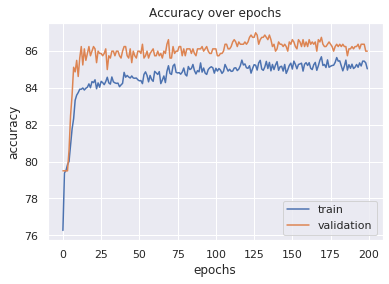

In [189]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [190]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

[[0.25656575]
 [0.31240812]
 [0.19270383]
 [0.09885968]
 [0.12959702]]


To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. So we will use the cutoff value 0.5 to indicate whether they are likely to exit or not.

In [191]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


### Making the Confusion Matrix

In [192]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1544   51]
 [ 221  184]]


This means that we should have about $(1544 + 184) = 1728$ correct classifications out of our total testing data size of $2000$.
This means that our accuracy for this trial was $1728 \div 2000 = 86.40\%$, which matches the classifier's prediction.

In [195]:
print (((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly.')

86.4 % of testing data was classified correctly.
